<a href="https://colab.research.google.com/github/nitosito/Moodle3.9/blob/main/PCA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

In [ ]:
# Ignorar warnings de convergencia
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Configuraciones visuales
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

#Carga del Dataset

In [ ]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')
ruta = "/gdrive/MyDrive/Parcial_IA/Hous.csv"
data = pd.read_csv(ruta)
data = pd.read_csv(ruta, sep=";")
# data = pd.read_csv('Hous.csv') # Removed the redundant line

print("\n Información del dataset:")
print(f"Dimensiones: {data.shape}")
print(f"Columnas: {data.columns.tolist()}")
print("\n Primeras 5 filas:")
print(data.head(10))
print("\n Información general:")
print(data.info())

print("Carga Exitosa")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).

 Información del dataset:
Dimensiones: (2930, 82)
Columnas: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fu

#Análisis Exploratorio de Datos (EDA)

ANALISIS EXPLORATORIO DE DATOS

Informacion del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bld

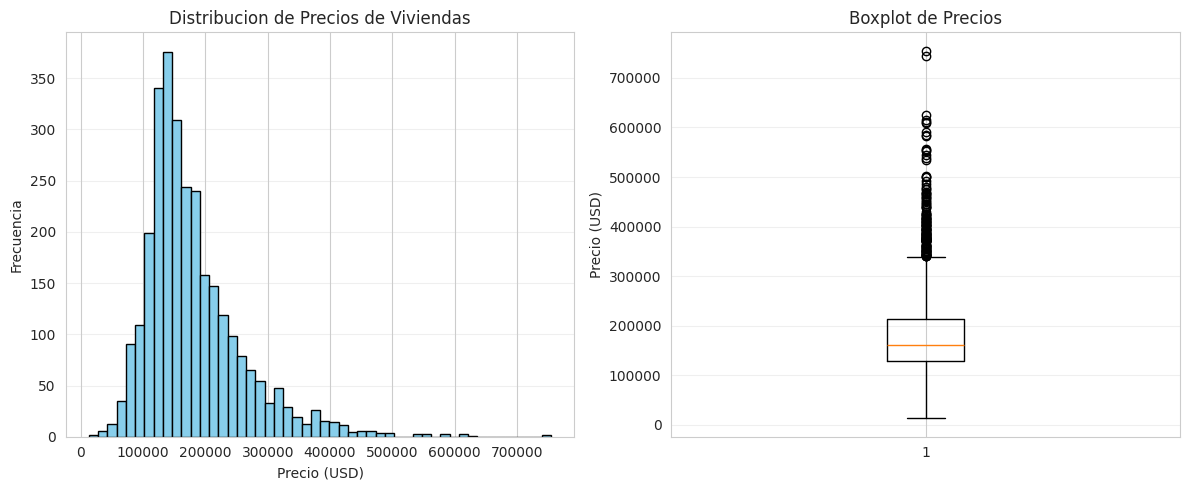


EDA completado


In [ ]:
print("ANALISIS EXPLORATORIO DE DATOS")
print("=" * 80)

print("\nInformacion del Dataset:")
print(data.info())

print("\n" + "=" * 80)
print("ESTADISTICAS DESCRIPTIVAS DE LA VARIABLE OBJETIVO")
print("=" * 80)
print(data['Price (USD)'].describe())

print("\n" + "=" * 80)
print("VALORES FALTANTES POR COLUMNA")
print("=" * 80)
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores Faltantes': missing_values.values,
    'Porcentaje': missing_percentage.values
})
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
print(missing_df)

print("\n" + "=" * 80)
print("TIPOS DE VARIABLES")
print("=" * 80)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

print(f"Variables Numericas: {len(numeric_cols)}")
print(f"Variables Categoricas: {len(categorical_cols)}")

print("\n" + "=" * 80)
print("VERIFICACION DE DUPLICADOS")
print("=" * 80)
print(f"Filas duplicadas: {data.duplicated().sum()}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['Price (USD)'], bins=50, edgecolor='black', color='skyblue')
plt.title('Distribucion de Precios de Viviendas')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(data['Price (USD)'])
plt.title('Boxplot de Precios')
plt.ylabel('Precio (USD)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nEDA completado")

#Matriz de Correlación

MATRIZ DE CORRELACION
Dimensiones de la matriz de correlacion: (39, 39)

Correlacion de variables con Price (USD):
Price (USD)       1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432914
Name: Price (USD), dtype: float64


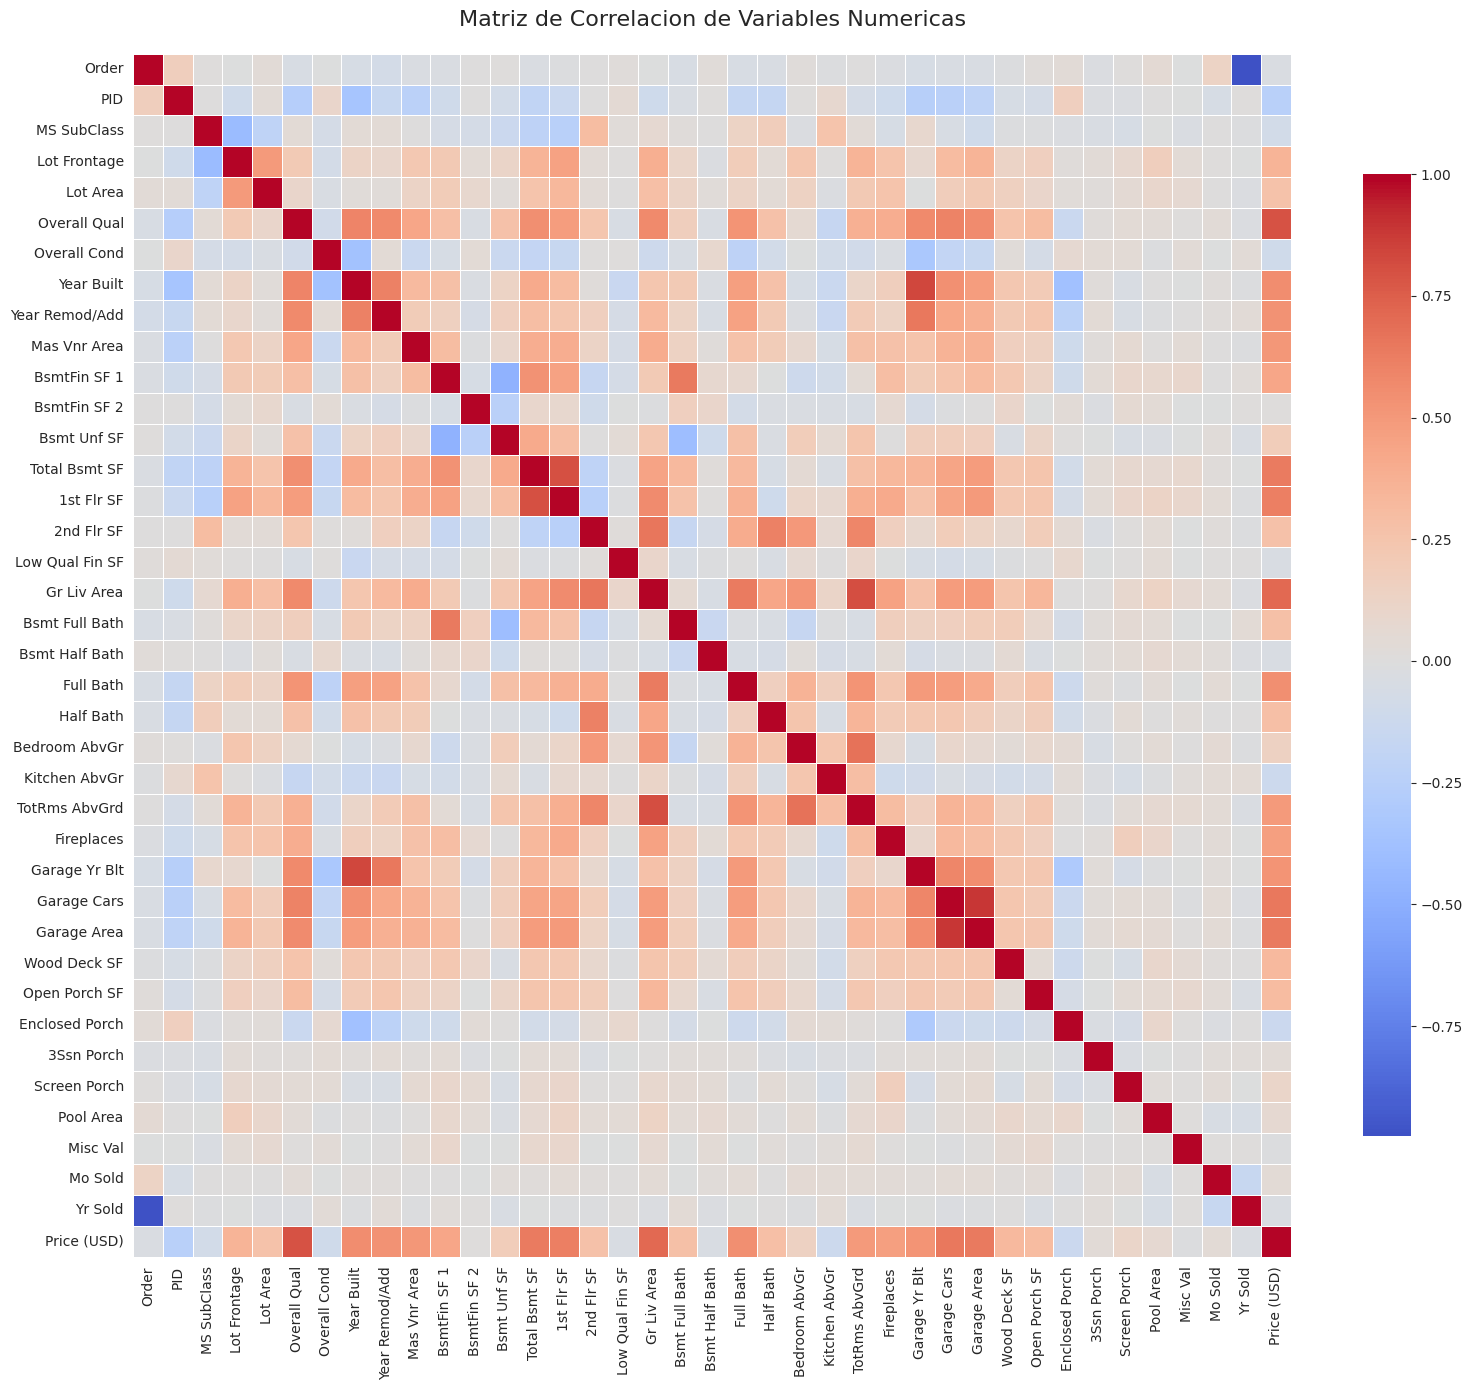


Matriz de correlacion generada


In [ ]:
print("MATRIZ DE CORRELACION")
print("=" * 80)

numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()

correlation_matrix = data[numeric_features].corr()

print(f"Dimensiones de la matriz de correlacion: {correlation_matrix.shape}")

print("\nCorrelacion de variables con Price (USD):")
price_correlation = correlation_matrix['Price (USD)'].sort_values(ascending=False)
print(price_correlation.head(15))

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlacion de Variables Numericas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\nMatriz de correlacion generada")

#Correlaciones más Significativas con Variable Objetivo

CORRELACIONES MAS SIGNIFICATIVAS CON VARIABLE OBJETIVO
Top 10 Correlaciones Positivas:
1. Overall Qual: 0.7993
2. Gr Liv Area: 0.7068
3. Garage Cars: 0.6479
4. Garage Area: 0.6404
5. Total Bsmt SF: 0.6323
6. 1st Flr SF: 0.6217
7. Year Built: 0.5584
8. Full Bath: 0.5456
9. Year Remod/Add: 0.5330
10. Garage Yr Blt: 0.5270

Top 10 Correlaciones Negativas:
1. Misc Val: -0.0157
2. Yr Sold: -0.0306
3. Order: -0.0314
4. Bsmt Half Bath: -0.0358
5. Low Qual Fin SF: -0.0377
6. MS SubClass: -0.0851
7. Overall Cond: -0.1017
8. Kitchen AbvGr: -0.1198
9. Enclosed Porch: -0.1288
10. PID: -0.2465


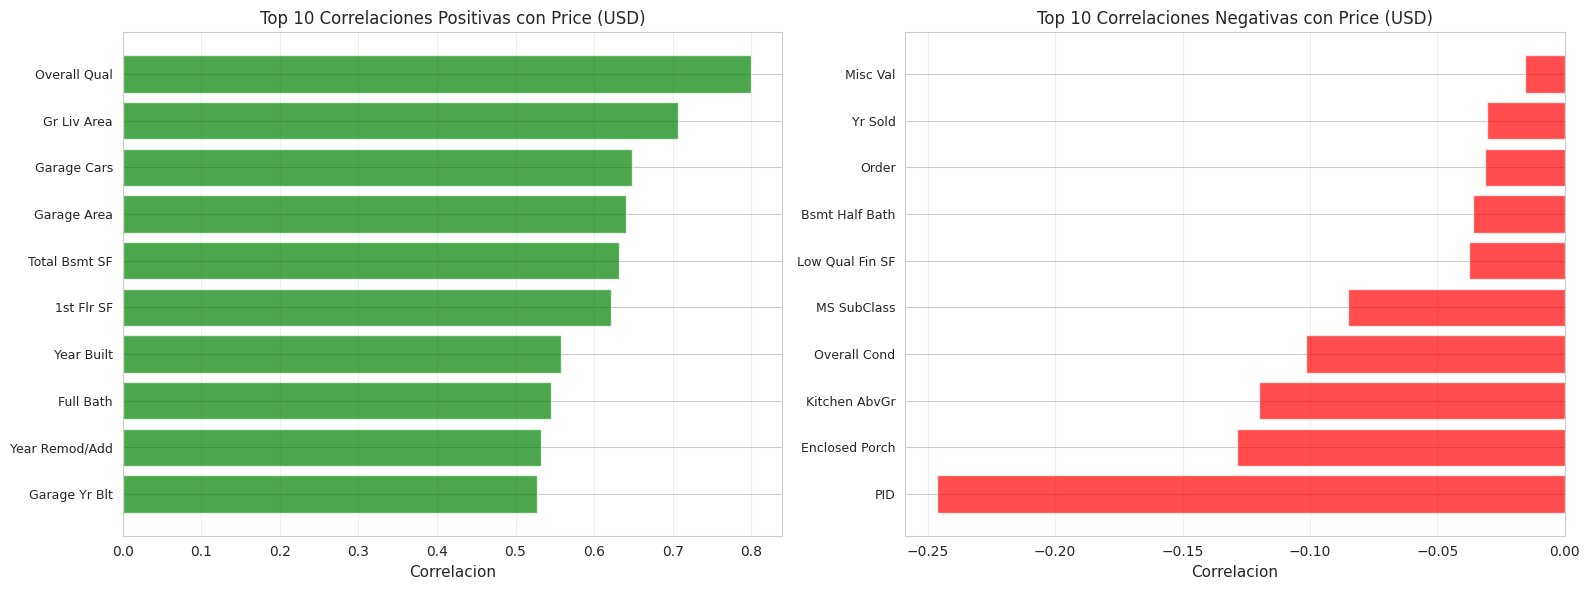


Analisis de correlaciones completado


In [ ]:
print("CORRELACIONES MAS SIGNIFICATIVAS CON VARIABLE OBJETIVO")
print("=" * 80)

price_corr = correlation_matrix['Price (USD)'].drop('Price (USD)').sort_values(ascending=False)

top_positive = price_corr.head(10)
top_negative = price_corr.tail(10)

print("Top 10 Correlaciones Positivas:")
for i, (feature, corr) in enumerate(top_positive.items(), 1):
    print(f"{i}. {feature}: {corr:.4f}")

print("\nTop 10 Correlaciones Negativas:")
for i, (feature, corr) in enumerate(top_negative.items(), 1):
    print(f"{i}. {feature}: {corr:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(range(len(top_positive)), top_positive.values, color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_positive)))
axes[0].set_yticklabels(top_positive.index, fontsize=9)
axes[0].set_xlabel('Correlacion', fontsize=11)
axes[0].set_title('Top 10 Correlaciones Positivas con Price (USD)', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

axes[1].barh(range(len(top_negative)), top_negative.values, color='red', alpha=0.7)
axes[1].set_yticks(range(len(top_negative)))
axes[1].set_yticklabels(top_negative.index, fontsize=9)
axes[1].set_xlabel('Correlacion', fontsize=11)
axes[1].set_title('Top 10 Correlaciones Negativas con Price (USD)', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nAnalisis de correlaciones completado")


#Análisis de Multicolinealidad

In [ ]:
print("ANALISIS DE MULTICOLINEALIDAD")
print("=" * 80)

high_corr_threshold = 0.8

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            high_corr_pairs.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlacion': correlation_matrix.iloc[i, j]
            })

if len(high_corr_pairs) > 0:
    df_high_corr = pd.DataFrame(high_corr_pairs)
    df_high_corr = df_high_corr.sort_values('Correlacion', ascending=False, key=abs)
    print(f"Pares de variables con correlacion > {high_corr_threshold}:")
    print(df_high_corr.to_string(index=False))
else:
    print(f"No se encontraron pares de variables con correlacion > {high_corr_threshold}")

print(f"\nTotal de pares con alta correlacion: {len(high_corr_pairs)}")
print("\nAnalisis de multicolinealidad completado")


ANALISIS DE MULTICOLINEALIDAD
Pares de variables con correlacion > 0.8:
   Variable 1    Variable 2  Correlacion
        Order       Yr Sold    -0.975993
  Garage Cars   Garage Area     0.889676
   Year Built Garage Yr Blt     0.834849
  Gr Liv Area TotRms AbvGrd     0.807772
Total Bsmt SF    1st Flr SF     0.800720

Total de pares con alta correlacion: 5

Analisis de multicolinealidad completado


# Eliminación de Columnas con Alto Porcentaje de Valores Faltantes

In [ ]:
print("LIMPIEZA PASO 1: ELIMINACION DE COLUMNAS CON ALTO PORCENTAJE DE VALORES FALTANTES")
print("=" * 80)

df_clean = data.copy()

print(f"Dimension inicial: {df_clean.shape}")

columnas_alto_missing = ['Pool QC', 'Misc Feature', 'Alley', 'Fence']
df_clean = df_clean.drop(columns=columnas_alto_missing)

print(f"Columnas eliminadas: {columnas_alto_missing}")
print(f"Dimension despues de eliminar columnas: {df_clean.shape}")


LIMPIEZA PASO 1: ELIMINACION DE COLUMNAS CON ALTO PORCENTAJE DE VALORES FALTANTES
Dimension inicial: (2930, 82)
Columnas eliminadas: ['Pool QC', 'Misc Feature', 'Alley', 'Fence']
Dimension despues de eliminar columnas: (2930, 78)


#Eliminación de Columnas No Predictivas

In [ ]:
print("LIMPIEZA PASO 2: ELIMINACION DE COLUMNAS NO PREDICTIVAS")
print("=" * 80)

columnas_no_predictivas = ['Order', 'PID']
df_clean = df_clean.drop(columns=columnas_no_predictivas)

print(f"Columnas eliminadas: {columnas_no_predictivas}")
print(f"Dimension despues de eliminar columnas no predictivas: {df_clean.shape}")


LIMPIEZA PASO 2: ELIMINACION DE COLUMNAS NO PREDICTIVAS
Columnas eliminadas: ['Order', 'PID']
Dimension despues de eliminar columnas no predictivas: (2930, 76)


#Imputación de Valores Faltantes en Variables Numéricas

In [ ]:
print("LIMPIEZA PASO 3: IMPUTACION DE VALORES FALTANTES EN VARIABLES NUMERICAS")
print("=" * 80)

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

if 'Price (USD)' in numeric_cols:
    numeric_cols.remove('Price (USD)')

print(f"Variables numericas a imputar: {len(numeric_cols)}")

for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean[col].median()
        valores_faltantes = df_clean[col].isnull().sum()
        df_clean[col].fillna(median_value, inplace=True)
        print(f"{col}: {valores_faltantes} valores faltantes rellenados con mediana ({median_value:.2f})")

print(f"\nValores faltantes restantes en variables numericas: {df_clean[numeric_cols].isnull().sum().sum()}")


LIMPIEZA PASO 3: IMPUTACION DE VALORES FALTANTES EN VARIABLES NUMERICAS
Variables numericas a imputar: 36
Lot Frontage: 490 valores faltantes rellenados con mediana (68.00)
Mas Vnr Area: 23 valores faltantes rellenados con mediana (0.00)
BsmtFin SF 1: 1 valores faltantes rellenados con mediana (370.00)
BsmtFin SF 2: 1 valores faltantes rellenados con mediana (0.00)
Bsmt Unf SF: 1 valores faltantes rellenados con mediana (466.00)
Total Bsmt SF: 1 valores faltantes rellenados con mediana (990.00)
Bsmt Full Bath: 2 valores faltantes rellenados con mediana (0.00)
Bsmt Half Bath: 2 valores faltantes rellenados con mediana (0.00)
Garage Yr Blt: 159 valores faltantes rellenados con mediana (1979.00)
Garage Cars: 1 valores faltantes rellenados con mediana (2.00)
Garage Area: 1 valores faltantes rellenados con mediana (480.00)

Valores faltantes restantes en variables numericas: 0


/tmp/ipython-input-3857002600.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_value, inplace=True)


#Imputación de Valores Faltantes en Variables Categóricas

In [ ]:
print("LIMPIEZA PASO 4: IMPUTACION DE VALORES FALTANTES EN VARIABLES CATEGORICAS")
print("=" * 80)

categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Variables categoricas a imputar: {len(categorical_cols)}")

for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_value = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
        valores_faltantes = df_clean[col].isnull().sum()
        df_clean[col].fillna(mode_value, inplace=True)
        print(f"{col}: {valores_faltantes} valores faltantes rellenados con moda ({mode_value})")

print(f"\nValores faltantes restantes en variables categoricas: {df_clean[categorical_cols].isnull().sum().sum()}")


LIMPIEZA PASO 4: IMPUTACION DE VALORES FALTANTES EN VARIABLES CATEGORICAS
Variables categoricas a imputar: 39
Mas Vnr Type: 1775 valores faltantes rellenados con moda (BrkFace)
Bsmt Qual: 80 valores faltantes rellenados con moda (TA)
Bsmt Cond: 80 valores faltantes rellenados con moda (TA)
Bsmt Exposure: 83 valores faltantes rellenados con moda (No)
BsmtFin Type 1: 80 valores faltantes rellenados con moda (GLQ)
BsmtFin Type 2: 81 valores faltantes rellenados con moda (Unf)
Electrical: 1 valores faltantes rellenados con moda (SBrkr)
Fireplace Qu: 1422 valores faltantes rellenados con moda (Gd)
Garage Type: 157 valores faltantes rellenados con moda (Attchd)
Garage Finish: 159 valores faltantes rellenados con moda (Unf)
Garage Qual: 159 valores faltantes rellenados con moda (TA)
Garage Cond: 159 valores faltantes rellenados con moda (TA)

Valores faltantes restantes en variables categoricas: 0


/tmp/ipython-input-854482411.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(mode_value, inplace=True)


#Detección y Eliminación de Outliers en Variable Objetivo

In [ ]:
print("LIMPIEZA PASO 5: DETECCION Y ELIMINACION DE OUTLIERS EN VARIABLE OBJETIVO")
print("=" * 80)

Q1 = df_clean['Price (USD)'].quantile(0.25)
Q3 = df_clean['Price (USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Limite inferior: {lower_bound:.2f}")
print(f"Limite superior: {upper_bound:.2f}")

filas_antes = df_clean.shape[0]
df_clean = df_clean[(df_clean['Price (USD)'] >= lower_bound) & (df_clean['Price (USD)'] <= upper_bound)]
filas_despues = df_clean.shape[0]

print(f"\nFilas antes: {filas_antes}")
print(f"Filas despues: {filas_despues}")
print(f"Outliers eliminados: {filas_antes - filas_despues}")


LIMPIEZA PASO 5: DETECCION Y ELIMINACION DE OUTLIERS EN VARIABLE OBJETIVO
Q1: 129500.00
Q3: 213500.00
IQR: 84000.00
Limite inferior: -122500.00
Limite superior: 465500.00

Filas antes: 2930
Filas despues: 2904
Outliers eliminados: 26


#Detección y Eliminación de Outliers en Variables Numéricas

In [ ]:
print("LIMPIEZA PASO 6: DETECCION Y ELIMINACION DE OUTLIERS EXTREMOS EN VARIABLES NUMERICAS")
print("=" * 80)

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

if 'Price (USD)' in numeric_cols:
    numeric_cols.remove('Price (USD)')

filas_inicial = df_clean.shape[0]
print(f"Filas iniciales: {filas_inicial}")


variables_criticas = ['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Lot Area']

print(f"\nSolo se eliminaran outliers extremos en variables criticas: {variables_criticas}")

for col in variables_criticas:
    if col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 4 * IQR
        upper = Q3 + 4 * IQR

        antes = df_clean.shape[0]
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        despues = df_clean.shape[0]

        if antes != despues:
            print(f"{col}: {antes - despues} filas eliminadas (outliers extremos)")

        if (filas_inicial - df_clean.shape[0]) >= 1000:
            print(f"\nAdvertencia: Se alcanzo el limite de 1000 filas eliminadas")
            print(f"Deteniendo eliminacion de outliers en {col}")
            break

filas_final = df_clean.shape[0]
total_eliminadas = filas_inicial - filas_final

print(f"\nFilas finales: {filas_final}")
print(f"Total de filas eliminadas por outliers: {total_eliminadas}")
print(f"Porcentaje de datos retenidos: {(filas_final / filas_inicial) * 100:.2f}%")

if total_eliminadas > 1000:
    print(f"\nADVERTENCIA: Se eliminaron {total_eliminadas} filas, superando el limite de 1000")




LIMPIEZA PASO 6: DETECCION Y ELIMINACION DE OUTLIERS EXTREMOS EN VARIABLES NUMERICAS
Filas iniciales: 2904

Solo se eliminaran outliers extremos en variables criticas: ['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Lot Area']
Gr Liv Area: 3 filas eliminadas (outliers extremos)
1st Flr SF: 1 filas eliminadas (outliers extremos)
Lot Area: 32 filas eliminadas (outliers extremos)

Filas finales: 2868
Total de filas eliminadas por outliers: 36
Porcentaje de datos retenidos: 98.76%


#Verificación Final de Limpieza

In [ ]:
print("LIMPIEZA PASO 7: VERIFICACION FINAL")
print("=" * 80)

print(f"Dimension original del dataset: {data.shape}")
print(f"Dimension del dataset limpio: {df_clean.shape}")
print(f"Filas eliminadas en total: {data.shape[0] - df_clean.shape[0]}")
print(f"Porcentaje de datos retenidos: {(df_clean.shape[0] / data.shape[0]) * 100:.2f}%")

print("\nVerificacion de valores faltantes despues de limpieza:")
print(f"Total de valores faltantes: {df_clean.isnull().sum().sum()}")

if df_clean.isnull().sum().sum() > 0:
    print("\nColumnas con valores faltantes restantes:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

print("\nLimpieza de datos completada exitosamente")

LIMPIEZA PASO 7: VERIFICACION FINAL
Dimension original del dataset: (2930, 82)
Dimension del dataset limpio: (2868, 76)
Filas eliminadas en total: 62
Porcentaje de datos retenidos: 97.88%

Verificacion de valores faltantes despues de limpieza:
Total de valores faltantes: 0

Limpieza de datos completada exitosamente


#Creación del CSV Limpio

In [ ]:
df_clean.to_csv('Hous_clean.csv', index=False, sep=';')
print("Dataset limpio guardado como: Hous_clean.csv")
print(f"Dimension del dataset limpio: {df_clean.shape}")


Dataset limpio guardado como: Hous_clean.csv
Dimension del dataset limpio: (2868, 76)


#Preprocesamiento - Codificación de Variables Categóricas

In [ ]:
print("PREPROCESAMIENTO PASO 1: CODIFICACION DE VARIABLES CATEGORICAS")
print("=" * 80)

df_proc = df_clean.copy()

categorical_features = df_proc.select_dtypes(include=['object']).columns.tolist()

print(f"Variables categoricas a codificar: {len(categorical_features)}")

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_proc[col] = le.fit_transform(df_proc[col].astype(str))
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} categorias unicas codificadas")

print("\nCodificacion completada")


PREPROCESAMIENTO PASO 1: CODIFICACION DE VARIABLES CATEGORICAS
Variables categoricas a codificar: 39
MS Zoning: 7 categorias unicas codificadas
Street: 2 categorias unicas codificadas
Lot Shape: 4 categorias unicas codificadas
Land Contour: 4 categorias unicas codificadas
Utilities: 3 categorias unicas codificadas
Lot Config: 5 categorias unicas codificadas
Land Slope: 3 categorias unicas codificadas
Neighborhood: 28 categorias unicas codificadas
Condition 1: 9 categorias unicas codificadas
Condition 2: 8 categorias unicas codificadas
Bldg Type: 5 categorias unicas codificadas
House Style: 8 categorias unicas codificadas
Roof Style: 6 categorias unicas codificadas
Roof Matl: 6 categorias unicas codificadas
Exterior 1st: 16 categorias unicas codificadas
Exterior 2nd: 17 categorias unicas codificadas
Mas Vnr Type: 3 categorias unicas codificadas
Exter Qual: 4 categorias unicas codificadas
Exter Cond: 5 categorias unicas codificadas
Foundation: 6 categorias unicas codificadas
Bsmt Qual: 5

#Preprocesamiento - Separación de Variables y Normalización

In [ ]:
print("PREPROCESAMIENTO PASO 2: SEPARACION DE VARIABLES Y NORMALIZACION")
print("=" * 80)

X = df_proc.drop('Price (USD)', axis=1)
y = df_proc['Price (USD)']

print(f"Dimension de X (features): {X.shape}")
print(f"Dimension de y (target): {y.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nEstadisticas despues de normalizacion:")
print(f"Media de X_scaled: {X_scaled.mean().mean():.6f}")
print(f"Desviacion estandar de X_scaled: {X_scaled.std().mean():.6f}")

print("\nNormalizacion completada")


PREPROCESAMIENTO PASO 2: SEPARACION DE VARIABLES Y NORMALIZACION
Dimension de X (features): (2868, 75)
Dimension de y (target): (2868,)

Estadisticas despues de normalizacion:
Media de X_scaled: -0.000000
Desviacion estandar de X_scaled: 1.000174

Normalizacion completada


#Aplicación de PCA con Gráfica de Varianza Acumulada

APLICACION DE PCA Y GRAFICAS DE VARIANZA


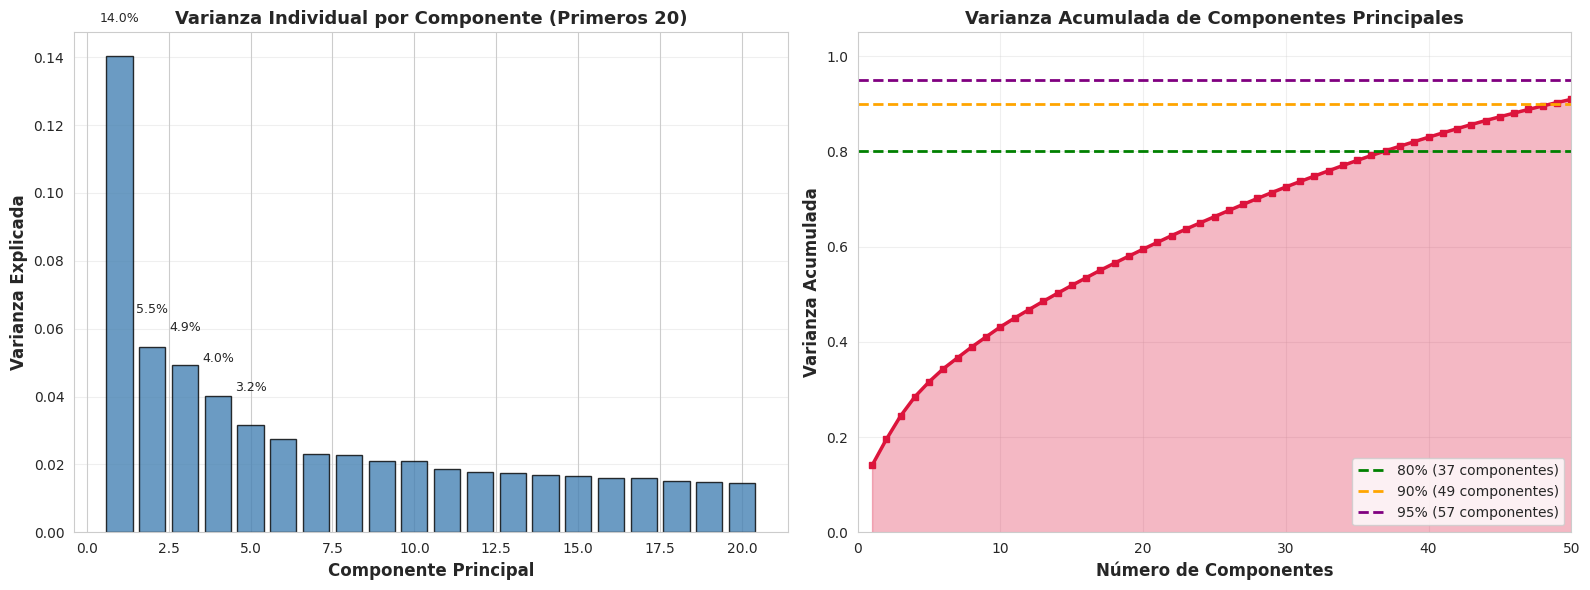

Gráfica guardada como: varianza_acumulada_detallada.png


In [ ]:
print("APLICACION DE PCA Y GRAFICAS DE VARIANZA")
print("=" * 80)

pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Calculate number of components for 80%, 90%, and 95% variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define x_range for plotting
x_range = range(1, len(explained_variance) + 1)

axes[0].bar(x=x_range[:20], height=explained_variance[:20],
            color='steelblue', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Componente Principal', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Varianza Explicada', fontsize=12, fontweight='bold')
axes[0].set_title('Varianza Individual por Componente (Primeros 20)',
                  fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for i in range(min(5, len(explained_variance))):
    axes[0].text(i+1, explained_variance[i] + 0.01,
                 f"{explained_variance[i]*100:.1f}%",
                 ha='center', fontsize=9)

axes[1].plot(x_range, cumulative_variance, color='crimson',
             marker='s', linewidth=2.5, markersize=5)
axes[1].fill_between(x_range, cumulative_variance, alpha=0.3, color='crimson')
axes[1].axhline(y=0.80, color='green', linestyle='--', linewidth=2,
                label=f'80% ({n_components_80} componentes)')
axes[1].axhline(y=0.90, color='orange', linestyle='--', linewidth=2,
                label=f'90% ({n_components_90} componentes)')
axes[1].axhline(y=0.95, color='purple', linestyle='--', linewidth=2,
                label=f'95% ({n_components_95} componentes)')

axes[1].set_xlabel('Número de Componentes', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Varianza Acumulada', fontsize=12, fontweight='bold')
axes[1].set_title('Varianza Acumulada de Componentes Principales',
                  fontsize=13, fontweight='bold')
axes[1].set_xlim(0, min(50, len(explained_variance)))
axes[1].set_ylim(0, 1.05)
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('varianza_acumulada_detallada.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Gráfica guardada como: varianza_acumulada_detallada.png")

APLICACION DE PCA
Componentes para 90% de varianza: 49
Componentes para 95% de varianza: 57


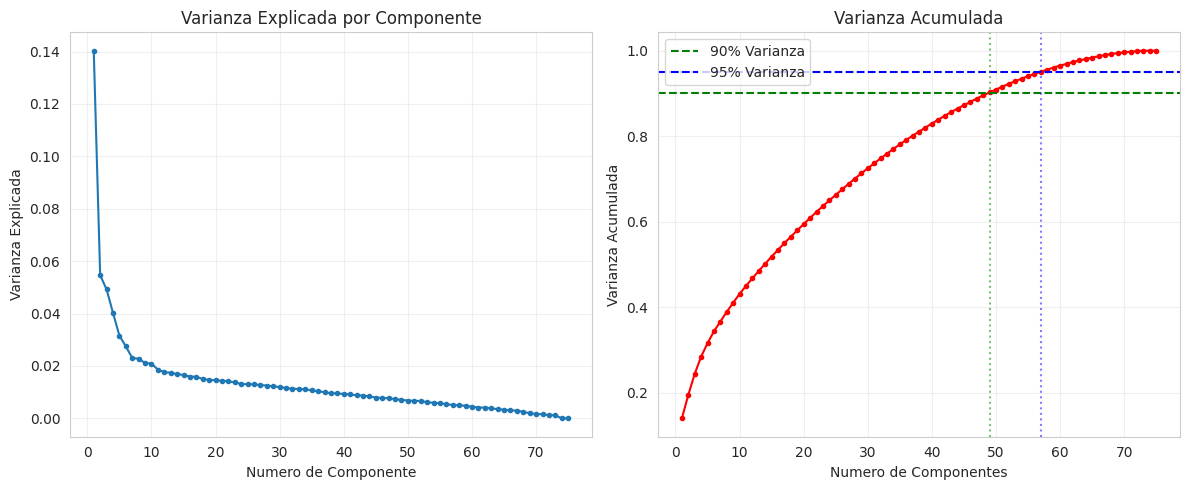


Numero de componentes seleccionados: 10
Varianza total explicada: 0.4314
Dimension de X despues de PCA: (2868, 10)

PCA aplicado correctamente


In [ ]:
print("APLICACION DE PCA")
print("=" * 80)

pca_full = PCA()
pca_full.fit(X_scaled)

variance_explained = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_explained)

n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Componentes para 90% de varianza: {n_components_90}")
print(f"Componentes para 95% de varianza: {n_components_95}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o', linestyle='-', markersize=3)
plt.title('Varianza Explicada por Componente')
plt.xlabel('Numero de Componente')
plt.ylabel('Varianza Explicada')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='red', markersize=3)
plt.axhline(y=0.90, color='green', linestyle='--', label='90% Varianza')
plt.axhline(y=0.95, color='blue', linestyle='--', label='95% Varianza')
plt.axvline(x=n_components_90, color='green', linestyle=':', alpha=0.5)
plt.axvline(x=n_components_95, color='blue', linestyle=':', alpha=0.5)
plt.title('Varianza Acumulada')
plt.xlabel('Numero de Componentes')
plt.ylabel('Varianza Acumulada')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# n_components_final = n_components_90 # Comentamos esta linea
n_components_final = 10 # Establecemos el numero de componentes a 10

pca = PCA(n_components=n_components_final)
X_pca = pca.fit_transform(X_scaled)

print(f"\nNumero de componentes seleccionados: {n_components_final}")
print(f"Varianza total explicada: {cumulative_variance[n_components_final - 1]:.4f}")
print(f"Dimension de X despues de PCA: {X_pca.shape}")

print("\nPCA aplicado correctamente")

# Gráfica Biplot con Variables Significativas

BIPLOT DE PCA (Mejorado)
Variables mas significativas en PCA (basado en Loadings):
1. Garage Area: 0.7019
2. Bsmt Qual: 0.7032
3. Full Bath: 0.7389
4. Garage Cars: 0.7407
5. 2nd Flr SF: 0.7478
6. Garage Yr Blt: 0.7502
7. TotRms AbvGrd: 0.8097
8. Overall Qual: 0.8226
9. Year Built: 0.8435
10. Gr Liv Area: 0.8666


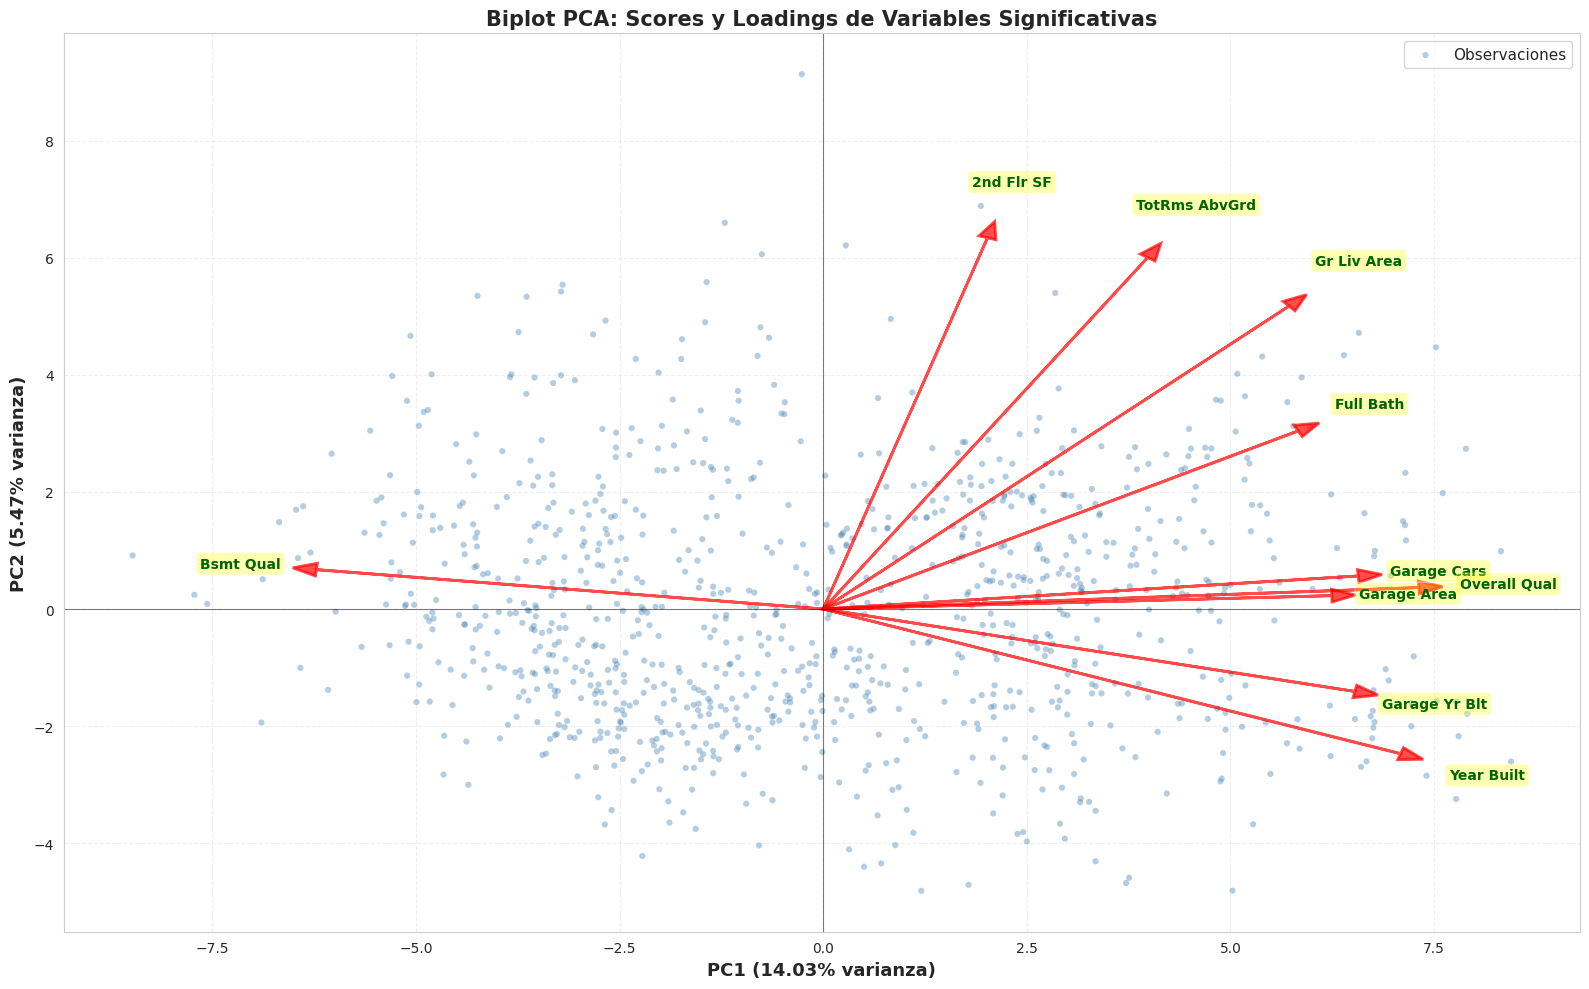

Biplot guardado como: biplot_pca_completo.png


In [ ]:
print("BIPLOT DE PCA (Mejorado)")
print("=" * 80)

# Re-calculate PCA for biplot (if not already done with n_components=2)
# Assuming X_scaled is available from previous steps
pca_biplot = PCA(n_components=2)
X_pca_2d = pca_biplot.fit_transform(X_scaled)

# Calculate loadings
loadings = pca_biplot.components_.T * np.sqrt(pca_biplot.explained_variance_)

# Create DataFrames for scores and loadings for easier plotting
dfScores = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
dfLoadings = pd.DataFrame(loadings, index=X.columns, columns=['PC1', 'PC2'])

# Identify top variables based on the magnitude of their loadings on PC1 and PC2
# Using the sum of squared loadings as a measure of importance
feature_importance = np.sqrt(np.sum(loadings**2, axis=1))
top_indices = np.argsort(feature_importance)[-10:] # Get indices of top 10 features
top_variables = X.columns[top_indices] # Get the names of top 10 features

print("Variables mas significativas en PCA (basado en Loadings):")
for i, var in enumerate(top_variables):
    print(f"{i+1}. {var}: {feature_importance[X.columns.get_loc(var)]:.4f}")


fig, ax = plt.subplots(figsize=(16, 10))

# Plot observations (scores)
sample_size = min(1000, len(dfScores))
sample_indices = np.random.choice(len(dfScores), sample_size, replace=False)
dfScores_sample = dfScores.iloc[sample_indices]

ax.scatter(dfScores_sample['PC1'], dfScores_sample['PC2'],
           alpha=0.4, s=20, color='steelblue', edgecolors='none',
           label='Observaciones')

# Set axis labels with explained variance
ax.set_xlabel(f'PC1 ({pca_biplot.explained_variance_ratio_[0]*100:.2f}% varianza)',
              fontsize=13, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_biplot.explained_variance_ratio_[1]*100:.2f}% varianza)',
              fontsize=13, fontweight='bold')
ax.set_title('Biplot PCA: Scores y Loadings de Variables Significativas',
             fontsize=15, fontweight='bold')

# Add origin lines
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)

# Scale factor for arrows
scale_factor = 0.8 * max(
    abs(dfScores_sample['PC1'].max()),
    abs(dfScores_sample['PC1'].min()),
    abs(dfScores_sample['PC2'].max()),
    abs(dfScores_sample['PC2'].min())
)

# Plot loadings (arrows)
for var in top_variables:
    pc1_load = dfLoadings.loc[var, 'PC1']
    pc2_load = dfLoadings.loc[var, 'PC2']

    arrow_scale = scale_factor / max(abs(dfLoadings['PC1'].max()),
                                     abs(dfLoadings['PC2'].max()))

    tipx = pc1_load * arrow_scale
    tipy = pc2_load * arrow_scale

    ax.arrow(0, 0, tipx, tipy,
             head_width=scale_factor*0.03,
             head_length=scale_factor*0.04,
             fc='red', ec='red', alpha=0.7, linewidth=2)

    ax.text(tipx*1.15, tipy*1.15, var,
            fontsize=10, fontweight='bold', color='darkgreen',
            ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

ax.grid(alpha=0.3, linestyle='--')
ax.legend(loc='upper right', fontsize=11)

plt.tight_layout()
plt.savefig('biplot_pca_completo.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Biplot guardado como: biplot_pca_completo.png")

BIPLOT DE PCA
Variables mas significativas en PCA:
1. Garage Area: 0.7019
2. Bsmt Qual: 0.7032
3. Full Bath: 0.7389
4. Garage Cars: 0.7407
5. 2nd Flr SF: 0.7478
6. Garage Yr Blt: 0.7502
7. TotRms AbvGrd: 0.8097
8. Overall Qual: 0.8226
9. Year Built: 0.8435
10. Gr Liv Area: 0.8666


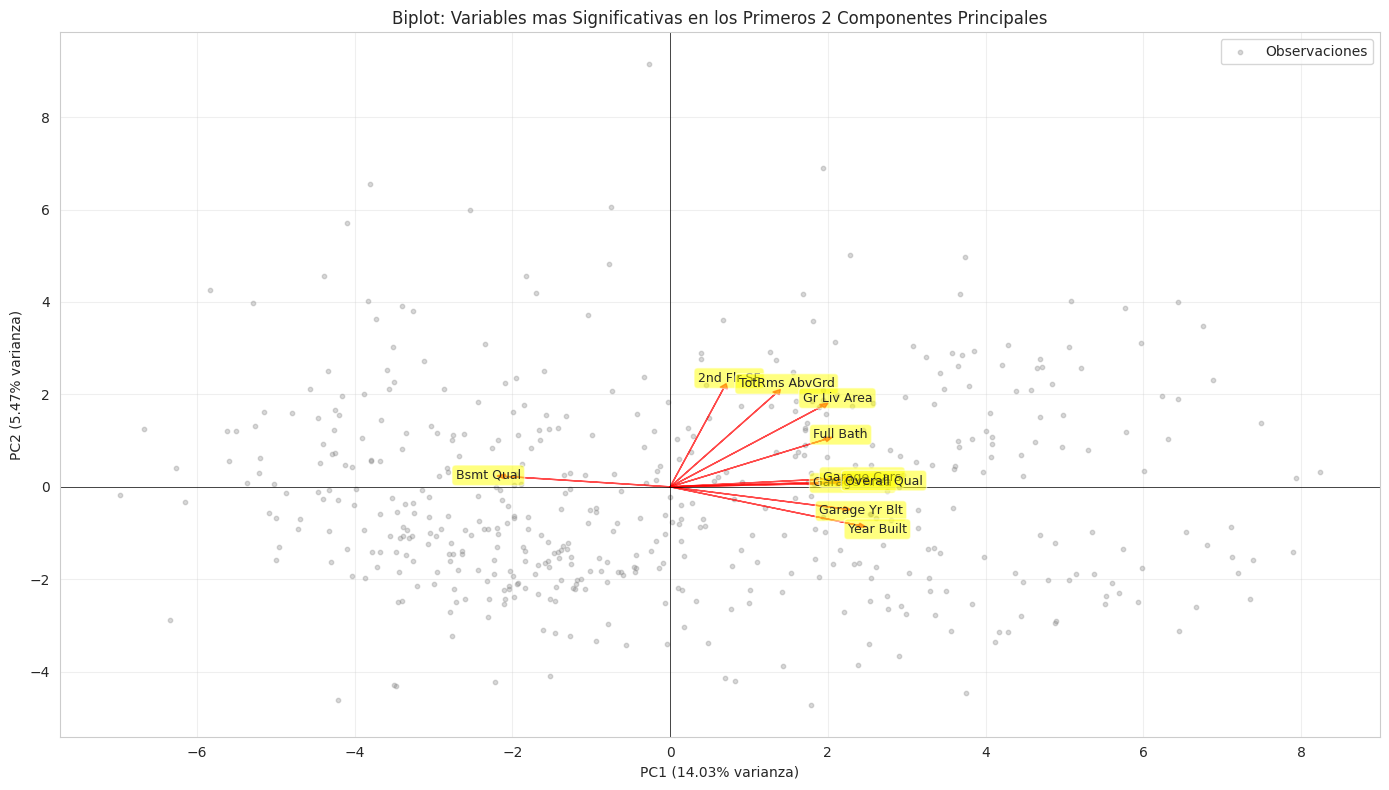


Biplot generado correctamente


In [ ]:
print("BIPLOT DE PCA")
print("=" * 80)

pca_biplot = PCA(n_components=2)
X_pca_2d = pca_biplot.fit_transform(X_scaled)

loadings = pca_biplot.components_.T * np.sqrt(pca_biplot.explained_variance_)

feature_importance = np.sqrt(np.sum(loadings**2, axis=1))
top_indices = np.argsort(feature_importance)[-10:]
top_features = X.columns[top_indices]

print("Variables mas significativas en PCA:")
for i, (idx, feature) in enumerate(zip(top_indices, top_features), 1):
    print(f"{i}. {feature}: {feature_importance[idx]:.4f}")

plt.figure(figsize=(14, 8))

sample_indices = np.random.choice(X_pca_2d.shape[0], size=min(500, X_pca_2d.shape[0]), replace=False)
plt.scatter(X_pca_2d[sample_indices, 0], X_pca_2d[sample_indices, 1],
            alpha=0.3, s=10, c='gray', label='Observaciones')

for i in top_indices:
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3,
              head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
    plt.text(loadings[i, 0]*3.3, loadings[i, 1]*3.3, X.columns[i],
             fontsize=9, ha='center', va='center',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

plt.xlabel(f'PC1 ({pca_biplot.explained_variance_ratio_[0]*100:.2f}% varianza)')
plt.ylabel(f'PC2 ({pca_biplot.explained_variance_ratio_[1]*100:.2f}% varianza)')
plt.title('Biplot: Variables mas Significativas en los Primeros 2 Componentes Principales')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

print("\nBiplot generado correctamente")


#División Train-Test (80-20)

In [ ]:
print("DIVISION DE DATOS: ENTRENAMIENTO Y PRUEBA (80-20)")
print("=" * 80)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20, random_state=42
)

print(f"Dimension X_train_pca: {X_train_pca.shape}")
print(f"Dimension X_test_pca: {X_test_pca.shape}")
print(f"Dimension y_train: {y_train.shape}")
print(f"Dimension y_test: {y_test.shape}")

print(f"\nPorcentaje de entrenamiento: {(X_train_pca.shape[0] / X_pca.shape[0]) * 100:.2f}%")
print(f"Porcentaje de prueba: {(X_test_pca.shape[0] / X_pca.shape[0]) * 100:.2f}%")

print("\nDivision de datos completada")


DIVISION DE DATOS: ENTRENAMIENTO Y PRUEBA (80-20)
Dimension X_train_pca: (2294, 10)
Dimension X_test_pca: (574, 10)
Dimension y_train: (2294,)
Dimension y_test: (574,)

Porcentaje de entrenamiento: 79.99%
Porcentaje de prueba: 20.01%

Division de datos completada


#Entrenamiento de los Modelos

#Modelo 1 - Regresión Lineal

MODELO 1: REGRESION LINEAL
R2 Entrenamiento: 0.8650
R2 Prueba: 0.8831
MSE Prueba: 645546160.0645
RMSE Prueba: 25407.6004
Validacion Cruzada R2: 0.8628 (+/- 0.0156)


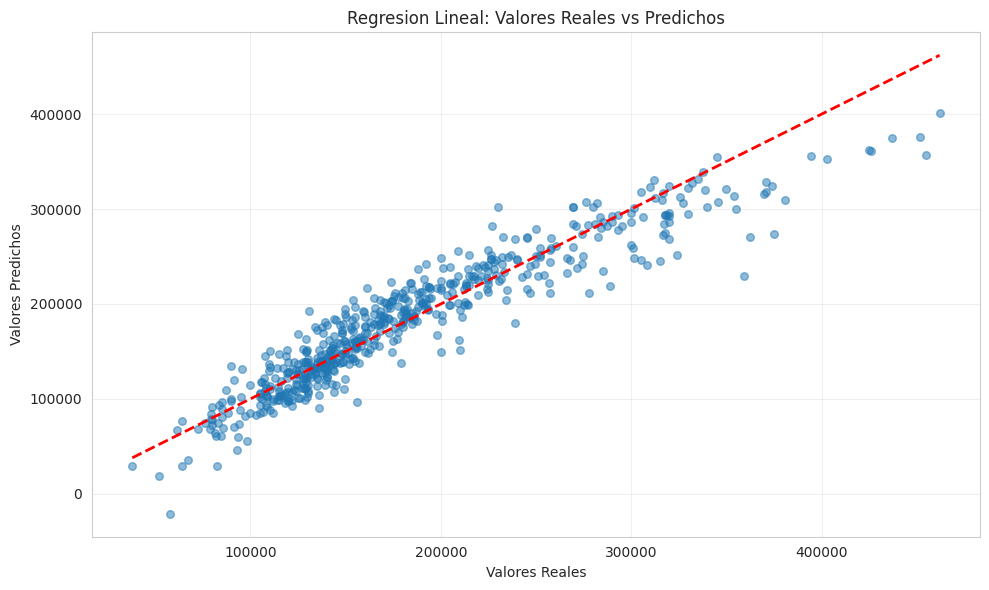


Modelo 1 completado


In [ ]:
print("MODELO 1: REGRESION LINEAL")
print("=" * 80)

model_lr = LinearRegression()
model_lr.fit(X_train_pca, y_train)

y_pred_train_lr = model_lr.predict(X_train_pca)
y_pred_test_lr = model_lr.predict(X_test_pca)

r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
rmse_test_lr = np.sqrt(mse_test_lr)

print(f"R2 Entrenamiento: {r2_train_lr:.4f}")
print(f"R2 Prueba: {r2_test_lr:.4f}")
print(f"MSE Prueba: {mse_test_lr:.4f}")
print(f"RMSE Prueba: {rmse_test_lr:.4f}")

cv_scores_lr = cross_val_score(model_lr, X_train_pca, y_train, cv=5, scoring='r2')
print(f"Validacion Cruzada R2: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_lr, alpha=0.5, s=30)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresion Lineal: Valores Reales vs Predichos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nModelo 1 completado")


#Modelo 2 - Ridge Regression

MODELO 2: RIDGE REGRESSION
Mejor alpha: 10
R2 Entrenamiento: 0.8650
R2 Prueba: 0.8831
MSE Prueba: 645637362.6351
RMSE Prueba: 25409.3952
Validacion Cruzada R2: 0.8628 (+/- 0.0155)


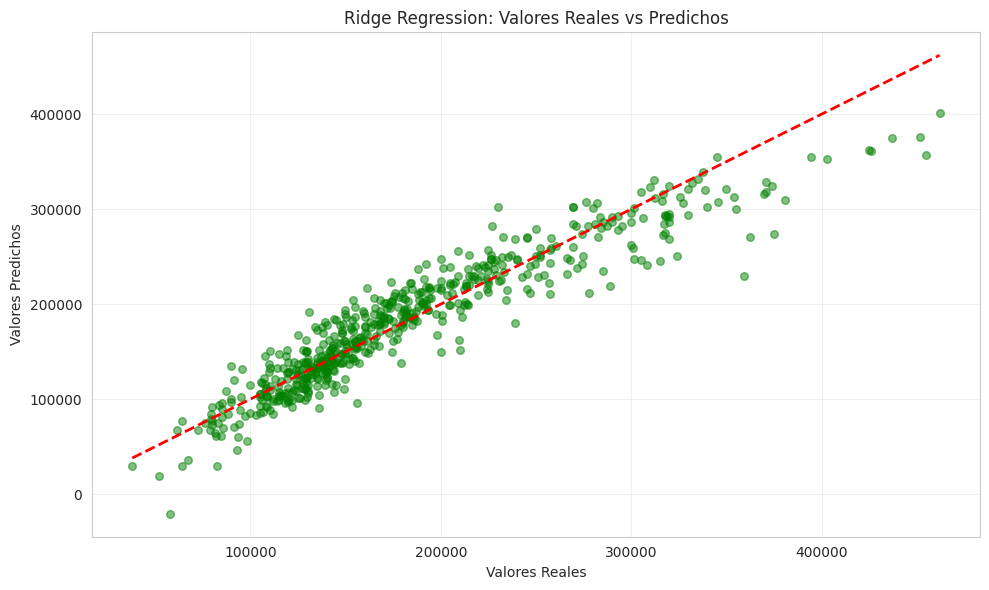


Modelo 2 completado


In [ ]:
print("MODELO 2: RIDGE REGRESSION")
print("=" * 80)

param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_train_pca, y_train)

model_ridge = grid_ridge.best_estimator_
print(f"Mejor alpha: {grid_ridge.best_params_['alpha']}")

y_pred_train_ridge = model_ridge.predict(X_train_pca)
y_pred_test_ridge = model_ridge.predict(X_test_pca)

r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

print(f"R2 Entrenamiento: {r2_train_ridge:.4f}")
print(f"R2 Prueba: {r2_test_ridge:.4f}")
print(f"MSE Prueba: {mse_test_ridge:.4f}")
print(f"RMSE Prueba: {rmse_test_ridge:.4f}")

cv_scores_ridge = cross_val_score(model_ridge, X_train_pca, y_train, cv=5, scoring='r2')
print(f"Validacion Cruzada R2: {cv_scores_ridge.mean():.4f} (+/- {cv_scores_ridge.std():.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_ridge, alpha=0.5, s=30, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Ridge Regression: Valores Reales vs Predichos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nModelo 2 completado")


#Modelo 3 - Lasso Regression

MODELO 3: LASSO REGRESSION
Mejor alpha: 0.1
R2 Entrenamiento: 0.8650
R2 Prueba: 0.8831
MSE Prueba: 645546890.8816
RMSE Prueba: 25407.6148
Validacion Cruzada R2: 0.8628 (+/- 0.0156)


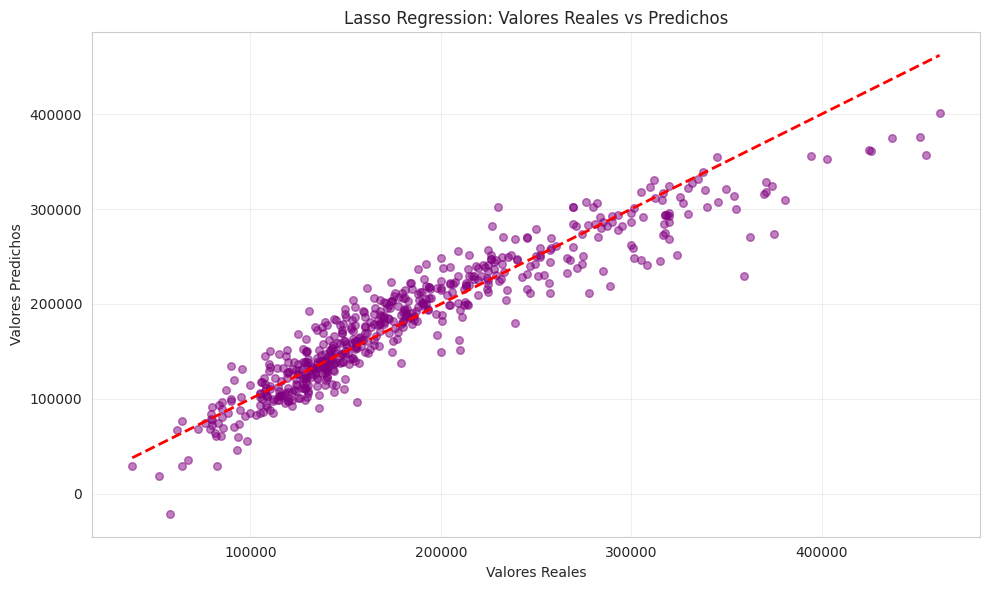


Modelo 3 completado


In [ ]:
print("MODELO 3: LASSO REGRESSION")
print("=" * 80)

param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='r2')
grid_lasso.fit(X_train_pca, y_train)

model_lasso = grid_lasso.best_estimator_
print(f"Mejor alpha: {grid_lasso.best_params_['alpha']}")

y_pred_train_lasso = model_lasso.predict(X_train_pca)
y_pred_test_lasso = model_lasso.predict(X_test_pca)

r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)

print(f"R2 Entrenamiento: {r2_train_lasso:.4f}")
print(f"R2 Prueba: {r2_test_lasso:.4f}")
print(f"MSE Prueba: {mse_test_lasso:.4f}")
print(f"RMSE Prueba: {rmse_test_lasso:.4f}")

cv_scores_lasso = cross_val_score(model_lasso, X_train_pca, y_train, cv=5, scoring='r2')
print(f"Validacion Cruzada R2: {cv_scores_lasso.mean():.4f} (+/- {cv_scores_lasso.std():.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_lasso, alpha=0.5, s=30, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Lasso Regression: Valores Reales vs Predichos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nModelo 3 completado")


#Modelo 4 - Decision Tree Regressor

MODELO 4: DECISION TREE REGRESSOR
Mejores parametros: {'max_depth': 5, 'min_samples_split': 5}
R2 Entrenamiento: 0.8837
R2 Prueba: 0.8582
MSE Prueba: 783041441.4941
RMSE Prueba: 27982.8776
Validacion Cruzada R2: 0.8354 (+/- 0.0223)


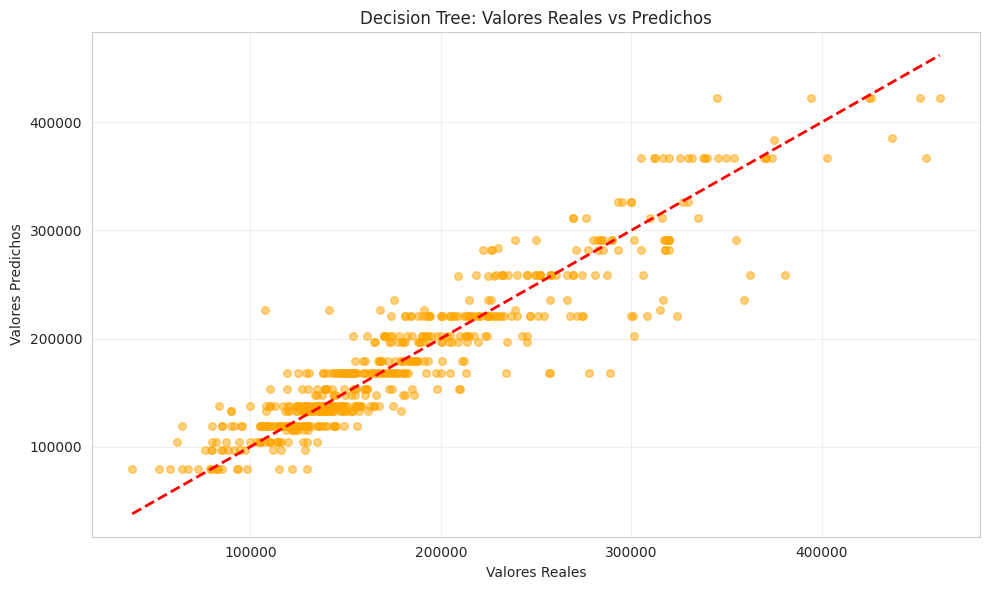


Modelo 4 completado


In [ ]:
print("MODELO 4: DECISION TREE REGRESSOR")
print("=" * 80)

param_grid_dt = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2')
grid_dt.fit(X_train_pca, y_train)

model_dt = grid_dt.best_estimator_
print(f"Mejores parametros: {grid_dt.best_params_}")

y_pred_train_dt = model_dt.predict(X_train_pca)
y_pred_test_dt = model_dt.predict(X_test_pca)

r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_test_dt = r2_score(y_test, y_pred_test_dt)
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)
rmse_test_dt = np.sqrt(mse_test_dt)

print(f"R2 Entrenamiento: {r2_train_dt:.4f}")
print(f"R2 Prueba: {r2_test_dt:.4f}")
print(f"MSE Prueba: {mse_test_dt:.4f}")
print(f"RMSE Prueba: {rmse_test_dt:.4f}")

cv_scores_dt = cross_val_score(model_dt, X_train_pca, y_train, cv=5, scoring='r2')
print(f"Validacion Cruzada R2: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std():.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_dt, alpha=0.5, s=30, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Decision Tree: Valores Reales vs Predichos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nModelo 4 completado")


#Modelo 5 - Random Forest Regressor

MODELO 5: RANDOM FOREST REGRESSOR
Mejores parametros: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
R2 Entrenamiento: 0.9845
R2 Prueba: 0.9014
MSE Prueba: 544642843.7955
RMSE Prueba: 23337.5844
Validacion Cruzada R2: 0.8895 (+/- 0.0191)


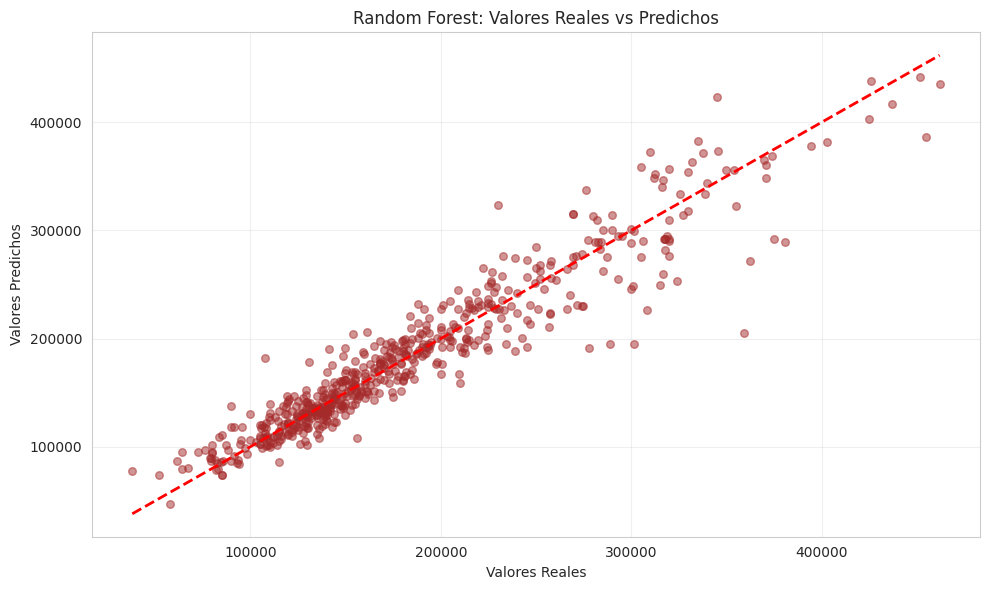


Modelo 5 completado


In [ ]:
print("MODELO 5: RANDOM FOREST REGRESSOR")
print("=" * 80)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_pca, y_train)

model_rf = grid_rf.best_estimator_
print(f"Mejores parametros: {grid_rf.best_params_}")

y_pred_train_rf = model_rf.predict(X_train_pca)
y_pred_test_rf = model_rf.predict(X_test_pca)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

print(f"R2 Entrenamiento: {r2_train_rf:.4f}")
print(f"R2 Prueba: {r2_test_rf:.4f}")
print(f"MSE Prueba: {mse_test_rf:.4f}")
print(f"RMSE Prueba: {rmse_test_rf:.4f}")

cv_scores_rf = cross_val_score(model_rf, X_train_pca, y_train, cv=5, scoring='r2')
print(f"Validacion Cruzada R2: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_rf, alpha=0.5, s=30, color='brown')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Random Forest: Valores Reales vs Predichos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nModelo 5 completado")


#Modelo 6 - Gradient Boosting Regressor

MODELO 6: GRADIENT BOOSTING REGRESSOR
Mejores parametros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
R2 Entrenamiento: 0.9377
R2 Prueba: 0.8999
MSE Prueba: 552695974.9616
RMSE Prueba: 23509.4869
Validacion Cruzada R2: 0.8939 (+/- 0.0195)


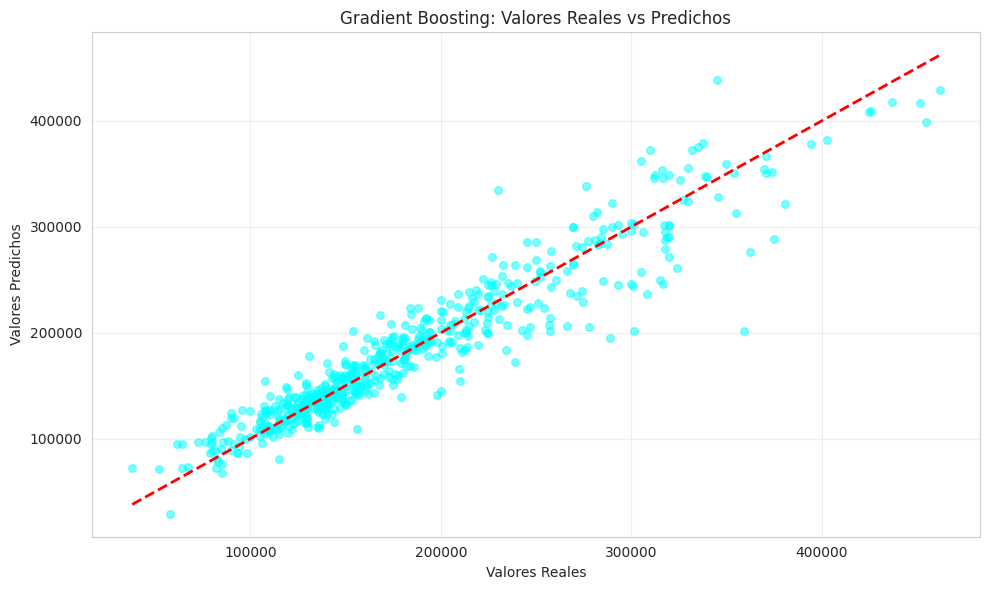


Modelo 6 completado


In [ ]:
print("MODELO 6: GRADIENT BOOSTING REGRESSOR")
print("=" * 80)

param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, scoring='r2', n_jobs=-1)
grid_gb.fit(X_train_pca, y_train)

model_gb = grid_gb.best_estimator_
print(f"Mejores parametros: {grid_gb.best_params_}")

y_pred_train_gb = model_gb.predict(X_train_pca)
y_pred_test_gb = model_gb.predict(X_test_pca)

r2_train_gb = r2_score(y_train, y_pred_train_gb)
r2_test_gb = r2_score(y_test, y_pred_test_gb)
mse_test_gb = mean_squared_error(y_test, y_pred_test_gb)
rmse_test_gb = np.sqrt(mse_test_gb)

print(f"R2 Entrenamiento: {r2_train_gb:.4f}")
print(f"R2 Prueba: {r2_test_gb:.4f}")
print(f"MSE Prueba: {mse_test_gb:.4f}")
print(f"RMSE Prueba: {rmse_test_gb:.4f}")

cv_scores_gb = cross_val_score(model_gb, X_train_pca, y_train, cv=5, scoring='r2')
print(f"Validacion Cruzada R2: {cv_scores_gb.mean():.4f} (+/- {cv_scores_gb.std():.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_gb, alpha=0.5, s=30, color='cyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gradient Boosting: Valores Reales vs Predichos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nModelo 6 completado")


#Modelo 7 - AdaBoost Regressor

MODELO 7: ADABOOST REGRESSOR
Mejores parametros: {'learning_rate': 0.01, 'n_estimators': 150}
R2 Entrenamiento: 0.8527
R2 Prueba: 0.8380
MSE Prueba: 894923276.8609
RMSE Prueba: 29915.2683
Validacion Cruzada R2: 0.8354 (+/- 0.0258)


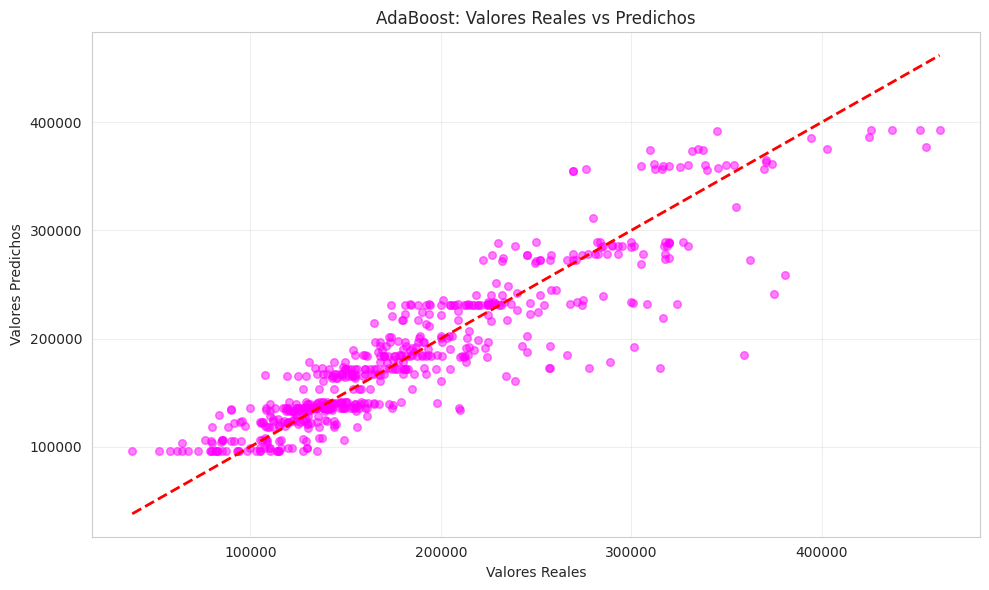


Modelo 7 completado


In [ ]:
print("MODELO 7: ADABOOST REGRESSOR")
print("=" * 80)

param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}
grid_ada = GridSearchCV(AdaBoostRegressor(random_state=42), param_grid_ada, cv=3, scoring='r2', n_jobs=-1)
grid_ada.fit(X_train_pca, y_train)

model_ada = grid_ada.best_estimator_
print(f"Mejores parametros: {grid_ada.best_params_}")

y_pred_train_ada = model_ada.predict(X_train_pca)
y_pred_test_ada = model_ada.predict(X_test_pca)

r2_train_ada = r2_score(y_train, y_pred_train_ada)
r2_test_ada = r2_score(y_test, y_pred_test_ada)
mse_test_ada = mean_squared_error(y_test, y_pred_test_ada)
rmse_test_ada = np.sqrt(mse_test_ada)

print(f"R2 Entrenamiento: {r2_train_ada:.4f}")
print(f"R2 Prueba: {r2_test_ada:.4f}")
print(f"MSE Prueba: {mse_test_ada:.4f}")
print(f"RMSE Prueba: {rmse_test_ada:.4f}")

cv_scores_ada = cross_val_score(model_ada, X_train_pca, y_train, cv=5, scoring='r2')
print(f"Validacion Cruzada R2: {cv_scores_ada.mean():.4f} (+/- {cv_scores_ada.std():.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_ada, alpha=0.5, s=30, color='magenta')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('AdaBoost: Valores Reales vs Predichos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nModelo 7 completado")


#Modelo 8 - Support Vector Regressor (SVM)

MODELO 8: SUPPORT VECTOR REGRESSOR (SVM)
Mejores parametros: {'C': 100, 'epsilon': 0.2, 'kernel': 'linear'}
R2 Entrenamiento: 0.8538
R2 Prueba: 0.8665
MSE Prueba: 737211232.7881
RMSE Prueba: 27151.6341
Validacion Cruzada R2: 0.8514 (+/- 0.0116)


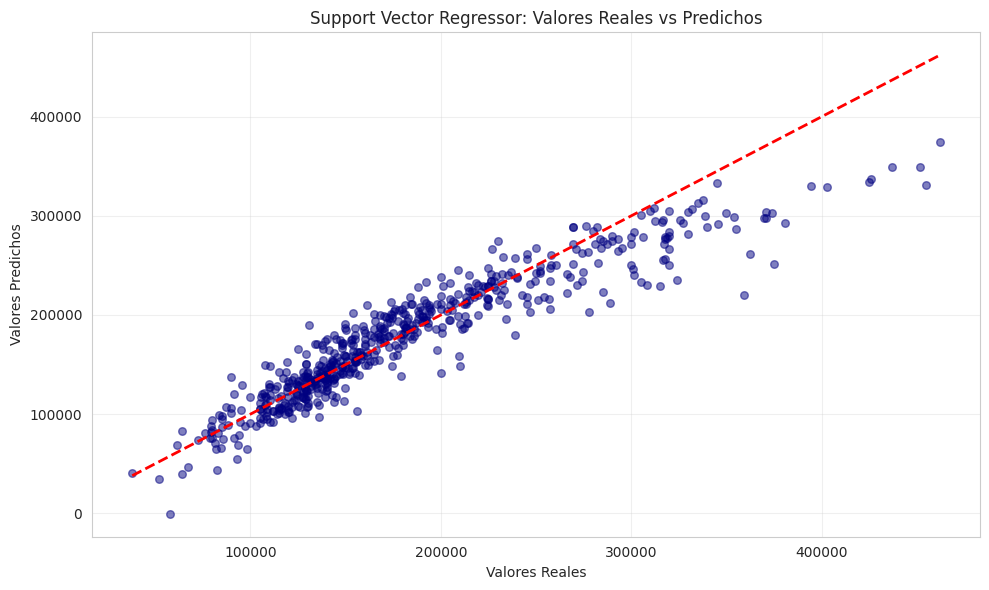


Modelo 8 completado


In [ ]:
print("MODELO 8: SUPPORT VECTOR REGRESSOR (SVM)")
print("=" * 80)

param_grid_svr = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear']
}
grid_svr = GridSearchCV(SVR(), param_grid_svr, cv=3, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train_pca, y_train)

model_svr = grid_svr.best_estimator_
print(f"Mejores parametros: {grid_svr.best_params_}")

y_pred_train_svr = model_svr.predict(X_train_pca)
y_pred_test_svr = model_svr.predict(X_test_pca)

r2_train_svr = r2_score(y_train, y_pred_train_svr)
r2_test_svr = r2_score(y_test, y_pred_test_svr)
mse_test_svr = mean_squared_error(y_test, y_pred_test_svr)
rmse_test_svr = np.sqrt(mse_test_svr)

print(f"R2 Entrenamiento: {r2_train_svr:.4f}")
print(f"R2 Prueba: {r2_test_svr:.4f}")
print(f"MSE Prueba: {mse_test_svr:.4f}")
print(f"RMSE Prueba: {rmse_test_svr:.4f}")

cv_scores_svr = cross_val_score(model_svr, X_train_pca, y_train, cv=5, scoring='r2')
print(f"Validacion Cruzada R2: {cv_scores_svr.mean():.4f} (+/- {cv_scores_svr.std():.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_svr, alpha=0.5, s=30, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Support Vector Regressor: Valores Reales vs Predichos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nModelo 8 completado")


#Modelo 9 - MLP Regressor (Red Neuronal)

MODELO 9: MLP REGRESSOR (RED NEURONAL)
Mejores parametros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01}
R2 Entrenamiento: 0.9167
R2 Prueba: 0.9125
MSE Prueba: 483404949.0944
RMSE Prueba: 21986.4720
Validacion Cruzada R2: 0.8913 (+/- 0.0195)


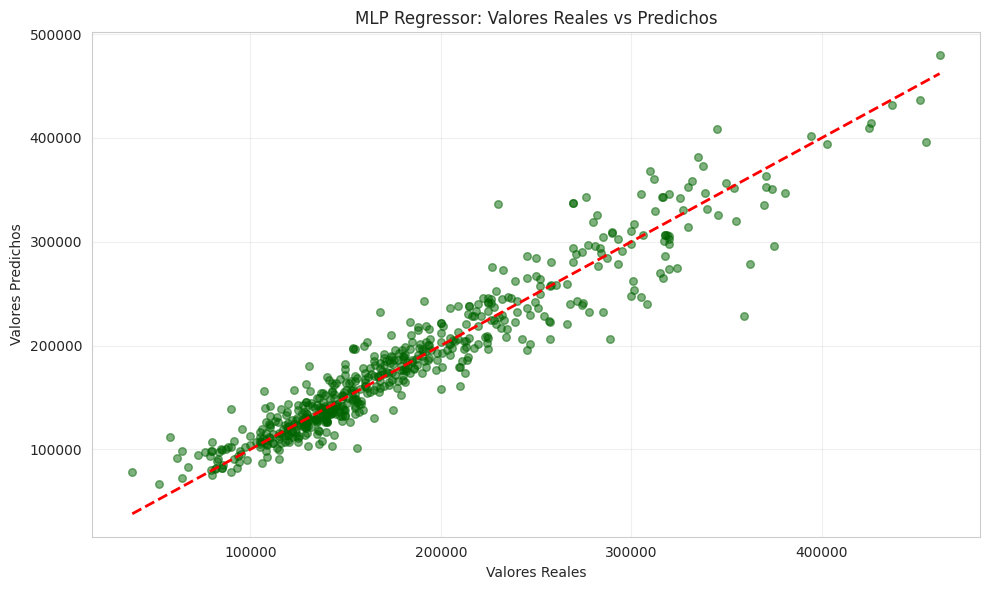


Modelo 9 completado


In [ ]:
print("MODELO 9: MLP REGRESSOR (RED NEURONAL)")
print("=" * 80)

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}
grid_mlp = GridSearchCV(MLPRegressor(random_state=42, max_iter=500), param_grid_mlp, cv=3, scoring='r2', n_jobs=-1)
grid_mlp.fit(X_train_pca, y_train)

model_mlp = grid_mlp.best_estimator_
print(f"Mejores parametros: {grid_mlp.best_params_}")

y_pred_train_mlp = model_mlp.predict(X_train_pca)
y_pred_test_mlp = model_mlp.predict(X_test_pca)

r2_train_mlp = r2_score(y_train, y_pred_train_mlp)
r2_test_mlp = r2_score(y_test, y_pred_test_mlp)
mse_test_mlp = mean_squared_error(y_test, y_pred_test_mlp)
rmse_test_mlp = np.sqrt(mse_test_mlp)

print(f"R2 Entrenamiento: {r2_train_mlp:.4f}")
print(f"R2 Prueba: {r2_test_mlp:.4f}")
print(f"MSE Prueba: {mse_test_mlp:.4f}")
print(f"RMSE Prueba: {rmse_test_mlp:.4f}")

cv_scores_mlp = cross_val_score(model_mlp, X_train_pca, y_train, cv=5, scoring='r2')
print(f"Validacion Cruzada R2: {cv_scores_mlp.mean():.4f} (+/- {cv_scores_mlp.std():.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_mlp, alpha=0.5, s=30, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('MLP Regressor: Valores Reales vs Predichos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nModelo 9 completado")


#Tabla Comparativa de Desempeño

In [ ]:
print("TABLA COMPARATIVA DE DESEMPENO DE MODELOS")
print("=" * 80)

resultados = {
    'Modelo': [
        'Linear Regression',
        'Ridge Regression',
        'Lasso Regression',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting',
        'AdaBoost',
        'Support Vector Regressor',
        'MLP Regressor'
    ],
    'R2 Train': [
        r2_train_lr,
        r2_train_ridge,
        r2_train_lasso,
        r2_train_dt,
        r2_train_rf,
        r2_train_gb,
        r2_train_ada,
        r2_train_svr,
        r2_train_mlp
    ],
    'R2 Test': [
        r2_test_lr,
        r2_test_ridge,
        r2_test_lasso,
        r2_test_dt,
        r2_test_rf,
        r2_test_gb,
        r2_test_ada,
        r2_test_svr,
        r2_test_mlp
    ],
    'MSE Test': [
        mse_test_lr,
        mse_test_ridge,
        mse_test_lasso,
        mse_test_dt,
        mse_test_rf,
        mse_test_gb,
        mse_test_ada,
        mse_test_svr,
        mse_test_mlp
    ],
    'RMSE Test': [
        rmse_test_lr,
        rmse_test_ridge,
        rmse_test_lasso,
        rmse_test_dt,
        rmse_test_rf,
        rmse_test_gb,
        rmse_test_ada,
        rmse_test_svr,
        rmse_test_mlp
    ]
}

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('R2 Test', ascending=False)

print(df_resultados.to_string(index=False))

df_resultados.to_csv('Resultados_Modelos.csv', index=False)
print("\nTabla de resultados guardada como: Resultados_Modelos.csv")

mejor_modelo_idx = df_resultados['R2 Test'].idxmax()
mejor_modelo = df_resultados.loc[mejor_modelo_idx, 'Modelo']
mejor_r2 = df_resultados.loc[mejor_modelo_idx, 'R2 Test']
mejor_rmse = df_resultados.loc[mejor_modelo_idx, 'RMSE Test']

print(f"\nMEJOR MODELO: {mejor_modelo}")
print(f"R2 en Prueba: {mejor_r2:.4f}")
print(f"RMSE en Prueba: {mejor_rmse:.4f}")


TABLA COMPARATIVA DE DESEMPENO DE MODELOS
                  Modelo  R2 Train  R2 Test     MSE Test    RMSE Test
           MLP Regressor  0.916652 0.912485 4.834049e+08 21986.471957
           Random Forest  0.984475 0.901399 5.446428e+08 23337.584361
       Gradient Boosting  0.937750 0.899941 5.526960e+08 23509.486914
       Linear Regression  0.864979 0.883132 6.455462e+08 25407.600439
        Lasso Regression  0.864979 0.883131 6.455469e+08 25407.614821
        Ridge Regression  0.864979 0.883115 6.456374e+08 25409.395165
Support Vector Regressor  0.853768 0.866537 7.372112e+08 27151.634072
           Decision Tree  0.883747 0.858240 7.830414e+08 27982.877649
                AdaBoost  0.852743 0.837985 8.949233e+08 29915.268290

Tabla de resultados guardada como: Resultados_Modelos.csv

MEJOR MODELO: MLP Regressor
R2 en Prueba: 0.9125
RMSE en Prueba: 21986.4720


#Gráficas de Comparación

GRAFICAS DE COMPARACION DE MODELOS


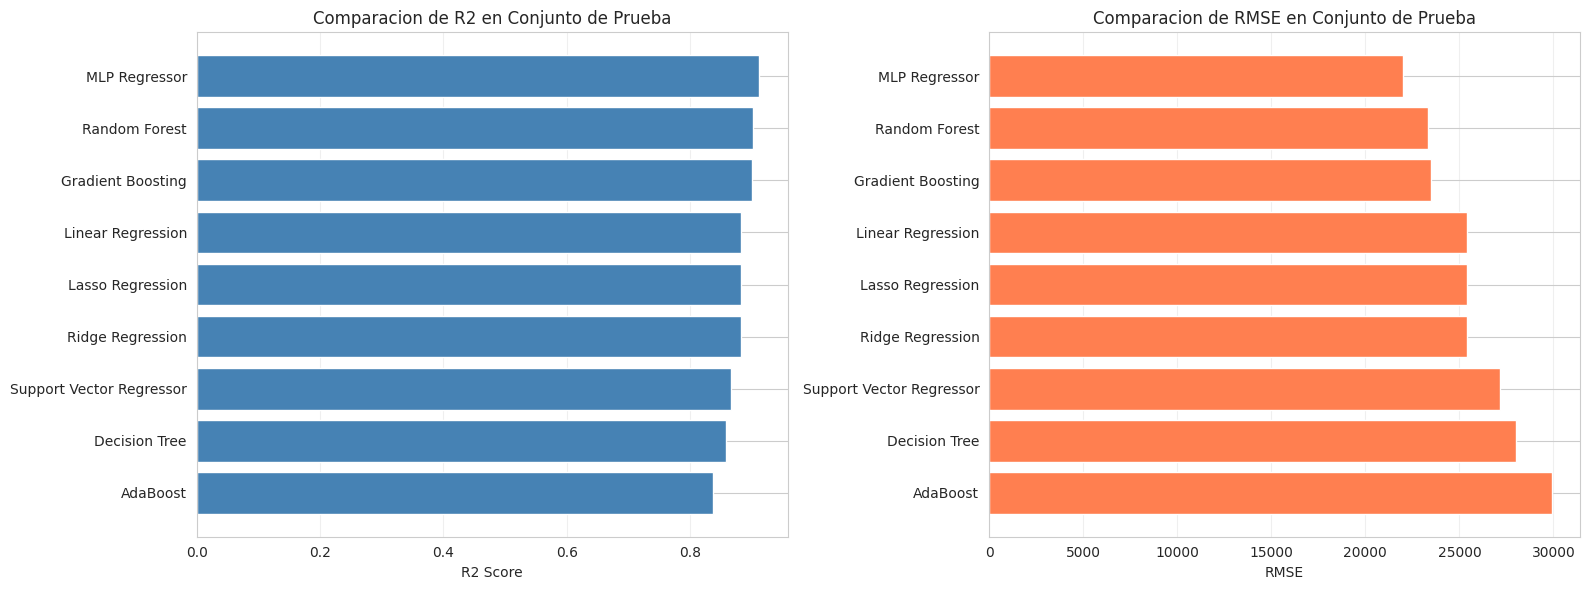

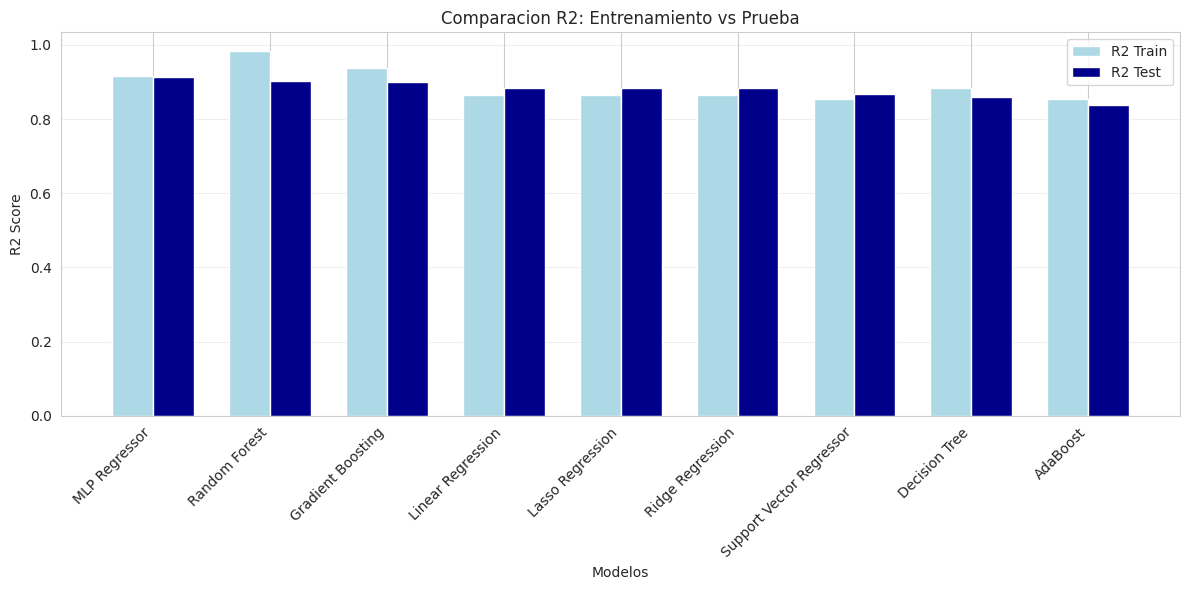


Graficas de comparacion generadas correctamente


In [ ]:
print("GRAFICAS DE COMPARACION DE MODELOS")
print("=" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(df_resultados['Modelo'], df_resultados['R2 Test'], color='steelblue')
axes[0].set_xlabel('R2 Score')
axes[0].set_title('Comparacion de R2 en Conjunto de Prueba')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

axes[1].barh(df_resultados['Modelo'], df_resultados['RMSE Test'], color='coral')
axes[1].set_xlabel('RMSE')
axes[1].set_title('Comparacion de RMSE en Conjunto de Prueba')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
x = np.arange(len(df_resultados['Modelo']))
width = 0.35

plt.bar(x - width/2, df_resultados['R2 Train'], width, label='R2 Train', color='lightblue')
plt.bar(x + width/2, df_resultados['R2 Test'], width, label='R2 Test', color='darkblue')

plt.xlabel('Modelos')
plt.ylabel('R2 Score')
plt.title('Comparacion R2: Entrenamiento vs Prueba')
plt.xticks(x, df_resultados['Modelo'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nGraficas de comparacion generadas correctamente")
